## Задание 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE


In [3]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
target = boston.target

C:\Users\user\Documents\Git_my_room\LibPython\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [4]:
X_train, X_test, y_train, y_test  = train_test_split(df, target, test_size=0.2, random_state=42)

In [5]:
standart = StandardScaler()

X_train_std = pd.DataFrame(standart.fit_transform(X_train), columns=boston.feature_names)
X_test_std = pd.DataFrame(standart.transform(X_test), columns=boston.feature_names)


C:\Users\user\Documents\Git_my_room\LibPython\venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


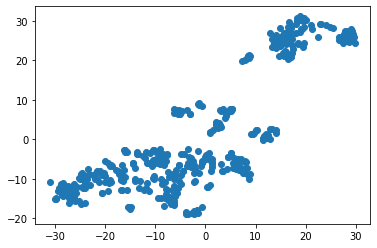

In [6]:
tsne_boston = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne_boston.fit_transform(X_train_std)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()


## Задание 2

In [7]:
from sklearn.cluster import KMeans
model_k_mean = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [8]:
X_train_k_mean = model_k_mean.fit_predict(X_train_std)
train_lablels = model_k_mean.labels_


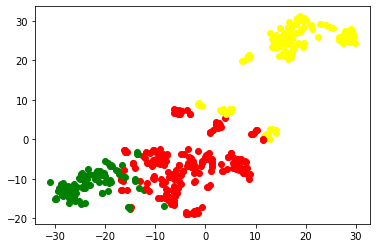

In [9]:
for i in range(len(train_lablels)):
  if train_lablels[i] == 0:
    plt.scatter(X_train_tsne[i, 0], X_train_tsne[i, 1], color='green')
  elif train_lablels[i] == 1:
    plt.scatter(X_train_tsne[i, 0], X_train_tsne[i, 1], color='yellow')
  elif train_lablels[i] == 2:
    plt.scatter(X_train_tsne[i, 0], X_train_tsne[i, 1], color='red')
plt.show()


In [ ]:
df_temp = pd.DataFrame({'Crim': X_train['CRIM'], 'Price': y_train, 'Cluster': train_lablels})
df_temp.groupby('Cluster').mean()

,Crim,Price
Cluster,,
0,0.073566,27.788372
1,10.797028,16.165354
2,0.421660,24.958115


In [ ]:
df_temp.groupby('Cluster').mean()

,Crim,Price
Cluster,,
0,0.073566,27.788372
1,10.797028,16.165354
2,0.421660,24.958115


## Задание 3

In [ ]:
test_labels = model_k_mean.predict(X_test_std)
df_temp_test = pd.DataFrame({'Crim': X_test['CRIM'], 'Price': y_test, 'Cluster': test_labels})


In [ ]:
df_temp_test.groupby('Cluster').mean()

,Crim,Price
Cluster,,
0,0.079852,28.413636
1,10.165531,16.437143
2,0.284583,22.031111
